# TASK 1: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# to mount your drive:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
reviews_df = pd.read_csv('amazon_alexa.tsv',sep='\t')
reviews_df.head

<bound method NDFrame.head of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                  

In [4]:
type(reviews_df)

pandas.core.frame.DataFrame

In [5]:
reviews_df = pd.DataFrame(reviews_df)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# TASK 2: EXPLORE DATASET

<Axes: >

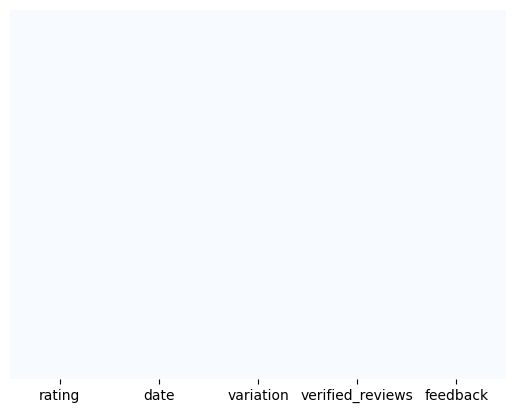

In [9]:
# plot graph to check null values - 
sns.heatmap(reviews_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [10]:
reviews_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [11]:
reviews_df[reviews_df['verified_reviews'].isnull()]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [12]:
reviews_df = reviews_df.dropna()

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

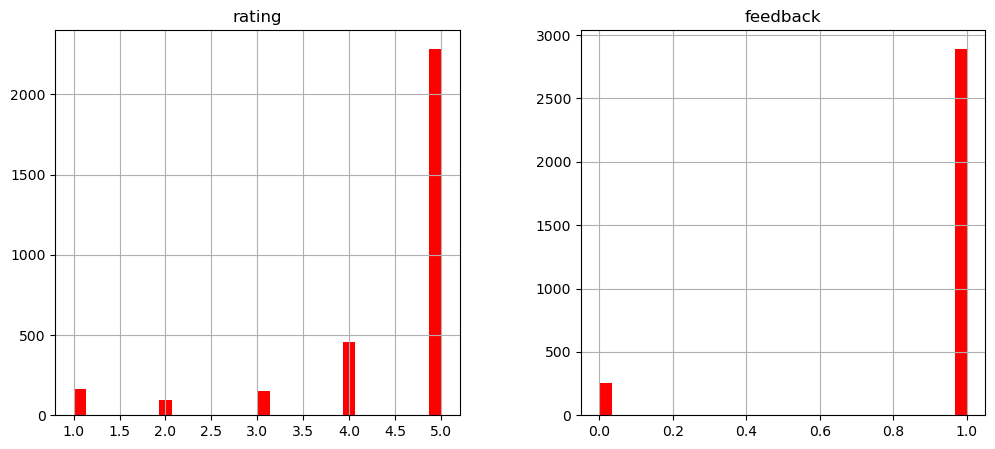

In [13]:
reviews_df.hist(bins=30,figsize=(12,5),color='r')

In [14]:
# length of verified_reviews - 
reviews_df['length'] = reviews_df['verified_reviews'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

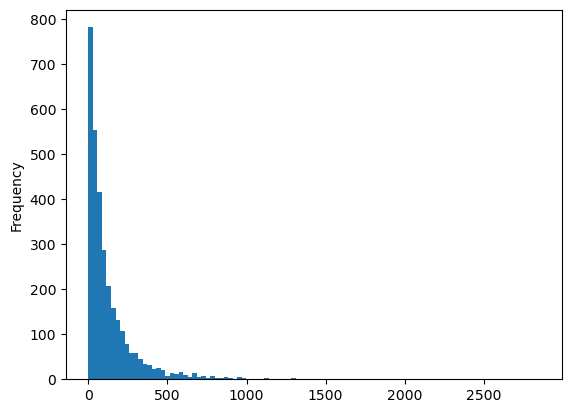

In [15]:
reviews_df['length'].plot(bins=100,kind='hist')

In [16]:
reviews_df.describe()

,rating,feedback,length
count,3149.000000,3149.000000,3149.000000
mean,4.463957,0.918704,132.090187
std,1.067773,0.273332,182.114569
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [17]:
# reviews_df[reviews_df['length']==reviews_df['length'].max()]['verified_reviews'].iloc[0]
reviews_df[reviews_df['length']==reviews_df['length'].max()]

,rating,date,variation,verified_reviews,feedback,length
2016,5,20-Jul-18,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [18]:
reviews_df[reviews_df['length']== 1]['verified_reviews'].iloc[0]

'😍'

In [19]:
positive = reviews_df[reviews_df['feedback']==1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [20]:
negitive = reviews_df[reviews_df['feedback']==0]
negitive

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [20]:
# dep = pd.crosstab(reviews_df['length'], reviews_df['feedback'])
# dep['Total'] = dep[1] + dep[0]
# dep['Pecentage'] = dep[1]/dep['Total']
# dep

<Axes: xlabel='feedback', ylabel='count'>

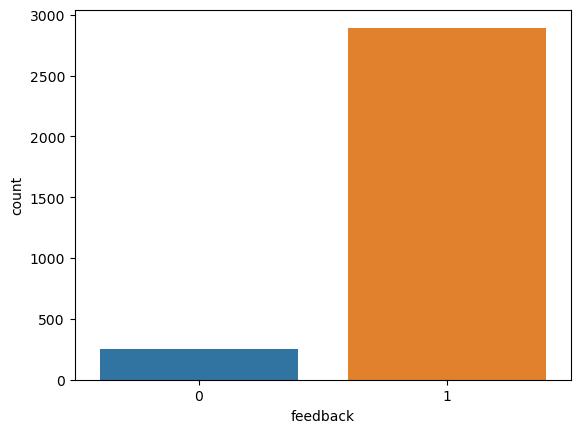

In [20]:
sns.countplot(x = reviews_df['feedback'],data=reviews_df)

<Axes: xlabel='rating', ylabel='count'>

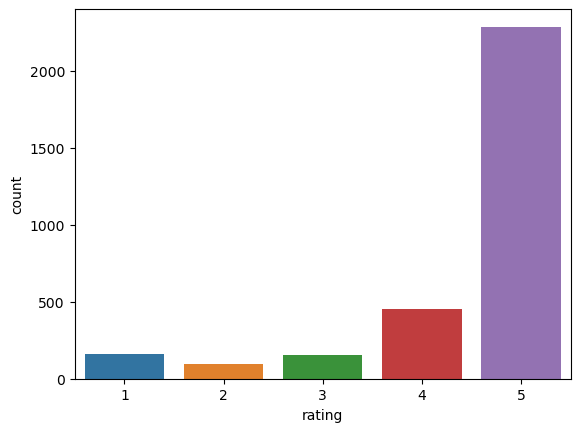

In [21]:
sns.countplot(x = reviews_df['rating'],data=reviews_df)

<Axes: xlabel='variation', ylabel='rating'>

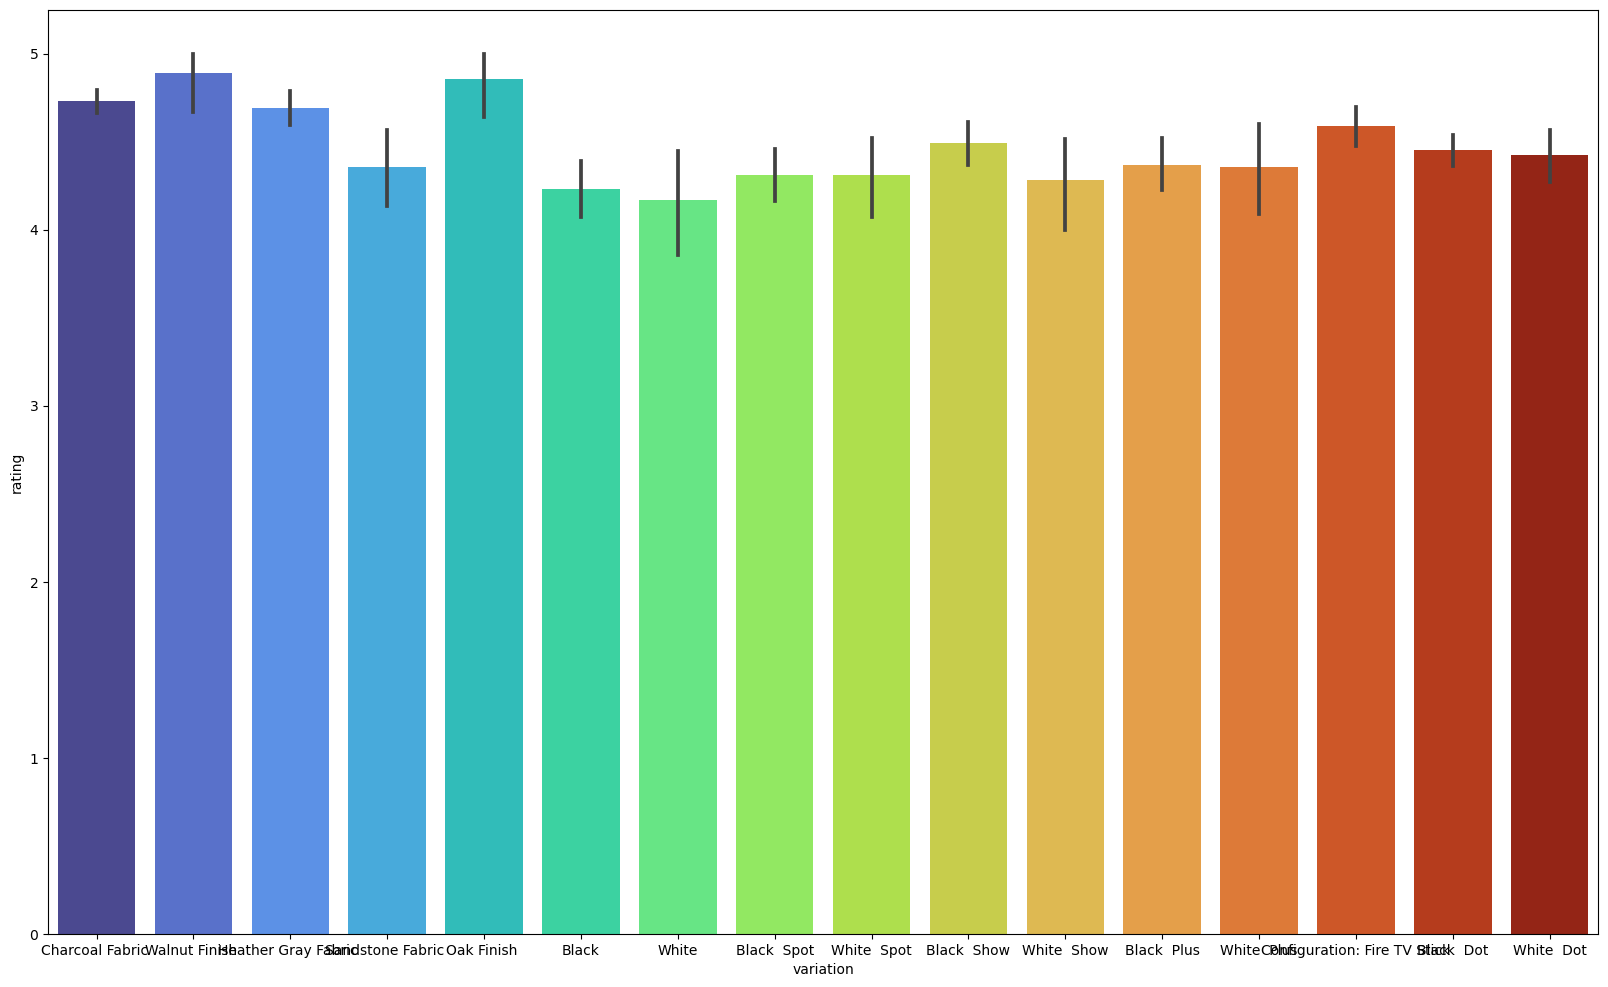

In [22]:
plt.figure(figsize=(20,12))
sns.barplot(x ='variation' ,y ='rating' ,data=reviews_df ,palette= 'turbo')

In [20]:
# word cloud - 
sen = reviews_df['verified_reviews'].astype(str).tolist()
sen

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [21]:
sen_join = " ".join(sen)
sen_join

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

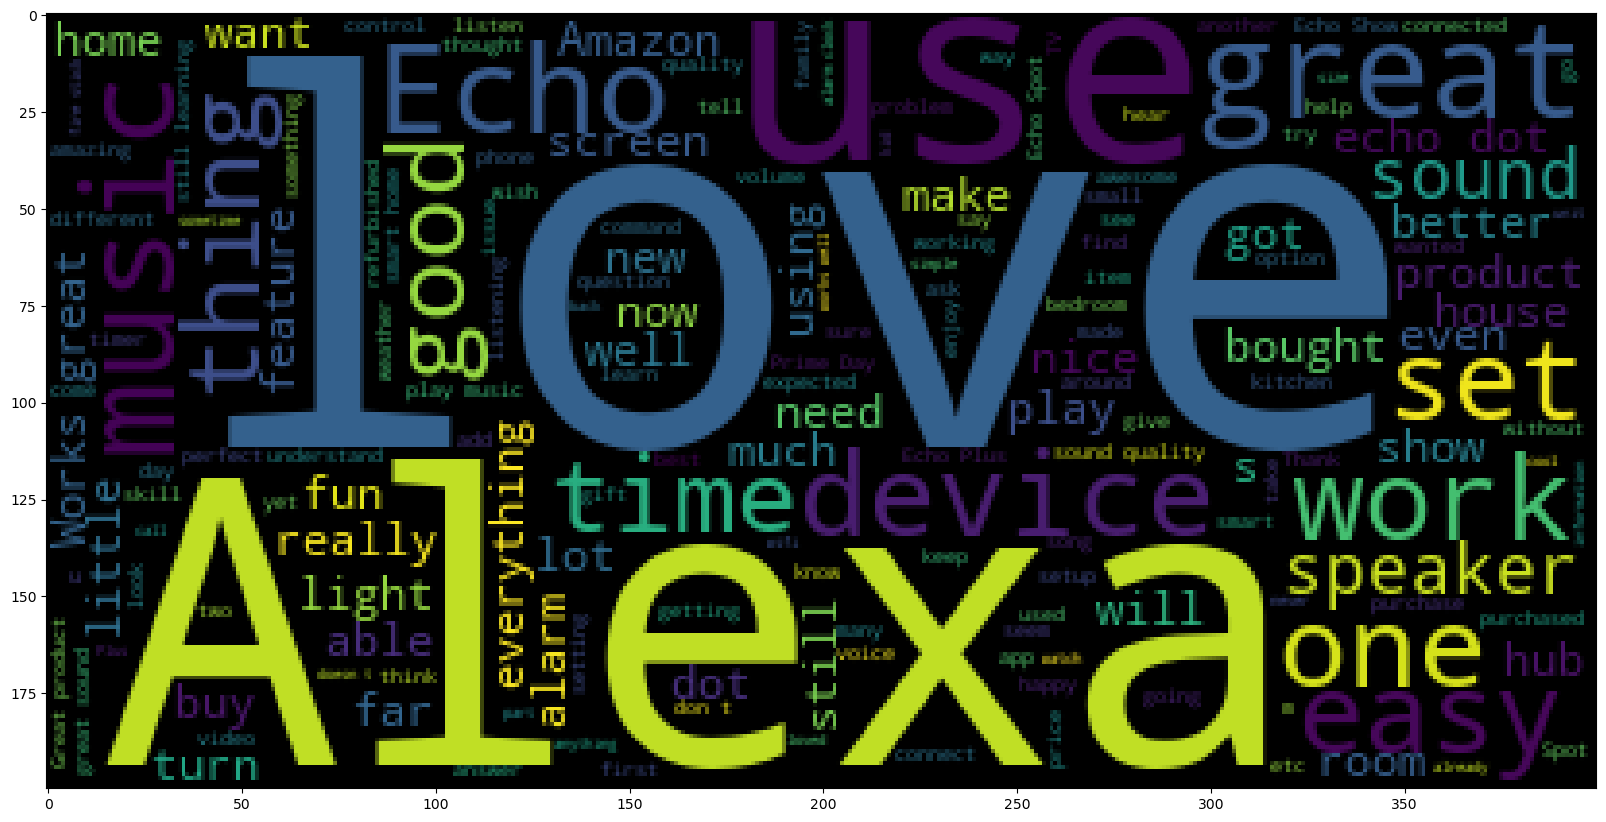

In [22]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sen_join))

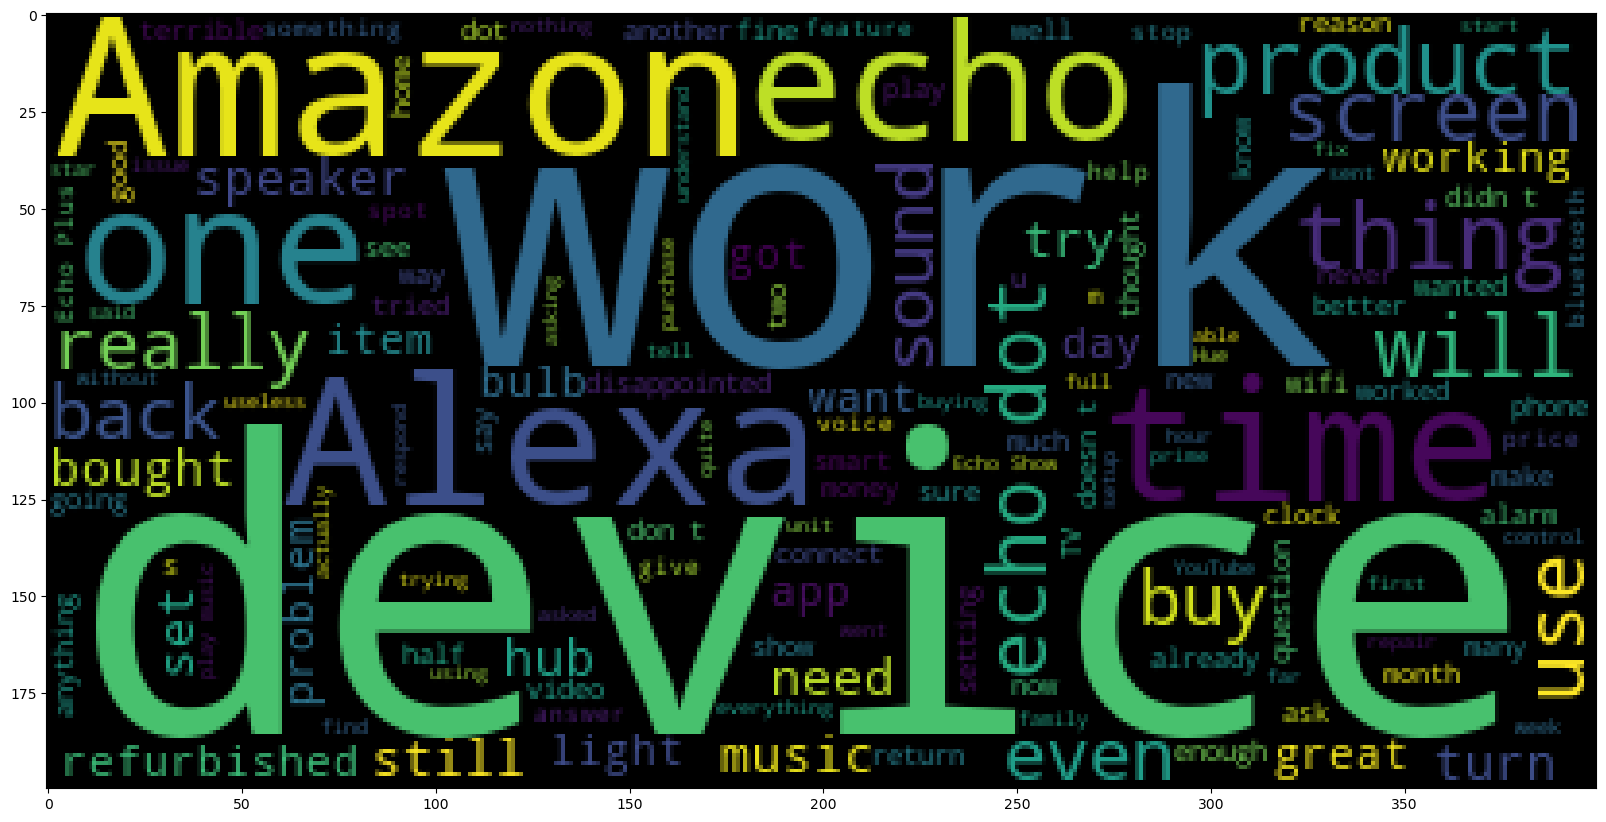

In [23]:
# wordcloud for negative df
neg_sen = negitive['verified_reviews'].astype(str).tolist()
senx = " ".join(neg_sen)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(senx))

# TASK 3: PERFORM DATA CLEANING

In [21]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [22]:
reviews_df = reviews_df.drop(['date','rating','length'],axis=1)
reviews_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [23]:
reviews_df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

In [27]:
reviews_df

,verified_reviews,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [26]:
column = 'variation'
reviews_df = pd.get_dummies(reviews_df, columns=[column], dtype='int', drop_first=True)
reviews_df

KeyError: "None of [Index(['variation'], dtype='object')] are in the [columns]"

In [28]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   verified_reviews                        3149 non-null   object
 1   feedback                                3149 non-null   int64 
 2   variation_Black  Dot                    3149 non-null   int32 
 3   variation_Black  Plus                   3149 non-null   int32 
 4   variation_Black  Show                   3149 non-null   int32 
 5   variation_Black  Spot                   3149 non-null   int32 
 6   variation_Charcoal Fabric               3149 non-null   int32 
 7   variation_Configuration: Fire TV Stick  3149 non-null   int32 
 8   variation_Heather Gray Fabric           3149 non-null   int32 
 9   variation_Oak Finish                    3149 non-null   int32 
 10  variation_Sandstone Fabric              3149 non-null   int32 
 11  variation

# TASK 4: LEARN HOW TO REMOVE PUNCTUATION FROM TEXT

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
test = "hello mr x@ , iam happy /!!! good day."

In [31]:
test_pun = [char for char in test if char not in string.punctuation]
test_pun

['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'm',
 'r',
 ' ',
 'x',
 ' ',
 ' ',
 'i',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 ' ',
 'g',
 'o',
 'o',
 'd',
 ' ',
 'd',
 'a',
 'y']

In [32]:
# join the string - 
test_pun = ''.join(test_pun)
test_pun

'hello mr x  iam happy  good day'

# TASK 5: UNDERSTAND HOW TO REMOVE STOPWORDS

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
# remove stopwords from our test string - 
test_pun = [char for char in test_pun.split() if char.lower() not in stopwords.words('english')]
test_pun

['hello', 'mr', 'x', 'iam', 'happy', 'good', 'day']

In [38]:
# remove punctuation and stopwords - 
x = 'remove the $ punc*tuations@ and the stopwords, is it fine ? '
step = [char for char in x if char not in string.punctuation]
step = ''.join(step)
step = [char for char in step.split() if char.lower() not in stopwords.words('english')]
step

['remove', 'punctuations', 'stopwords', 'fine']

In [39]:
# lemmatization - 
from nltk.stem import WordNetLemmatizer
st = ["running", "jumps", "played",'stopwords']
wd = WordNetLemmatizer()
lemmatized_words = [wd.lemmatize(word) for word in st]
result = " ".join(lemmatized_words)
print(result)
      

running jump played stopwords


In [40]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

x = 'remove the $ punc*tuations@ and the stopwords, is it fine ?'

# Remove punctuation
step = [char for char in x if char not in string.punctuation]
step = ''.join(step)

# Remove stopwords and perform lemmatization
wd = WordNetLemmatizer()
st = [wd.lemmatize(word) for word in step.split() if word.lower() not in stopwords.words('english')]

result = " ".join(st)
print(result)


remove punctuation stopwords fine


# TASK 6: UNDERSTAND HOW TO PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
sample = ['This is first doc','note open the doc','delete the papers']
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sample)
print(vectorizer.get_feature_names_out())

['delete' 'doc' 'first' 'is' 'note' 'open' 'papers' 'the' 'this']


In [42]:
print(x.toarray())

[[0 1 1 1 0 0 0 0 1]
 [0 1 0 0 1 1 0 1 0]
 [1 0 0 0 0 0 1 1 0]]


In [43]:
chl = ['Hello world','Hello Hello world','Hello world world']
y = vectorizer.fit_transform(chl)
print(vectorizer.get_feature_names_out())

['hello' 'world']


In [44]:
print(y.toarray())

[[1 1]
 [2 1]
 [1 2]]


# TASK 7: PERFORM DATA CLEANING BY APPLYING EVERYTHING

In [33]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords, (3) count vectorization
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def msg_cln(message):
    # handle non-string values in the function
#     if not isinstance(message, str):
#         return message
        
    punc_rm = [char for char in message if char not in string.punctuation]
    punc_rm_join = ''.join(punc_rm)
    # Remove stopwords and lemmatize
    wd = WordNetLemmatizer()
    stp =[wd.lemmatize(word) for word in punc_rm_join.split() if word.lower() not in stopwords.words('english')]
    #stp = [word for word in punc_rm_join.split() if word.lower() not in stopwords.words('english')]
    return " ".join(stp)
    #return stp

In [34]:
# Let's test the newly added function
df_clean = reviews_df['verified_reviews'].apply(msg_cln)

In [35]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3149, dtype: object

In [36]:
df_clean

0                                               Love Echo
1                                                   Loved
2       Sometimes playing game answer question correct...
3       lot fun thing 4 yr old learns dinosaur control...
4                                                   Music
                              ...                        
3145                           Perfect kid adult everyone
3146    Listening music searching location checking ti...
3147    love thing running entire home TV light thermo...
3148    complaint sound quality isnt great mostly use ...
3149                                                 Good
Name: verified_reviews, Length: 3149, dtype: object

In [37]:
df_clean[3]

'lot fun thing 4 yr old learns dinosaur control light play game like category nice sound playing music well'

In [38]:
reviews_df['verified_reviews'][3]

'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.'

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer= msg_cln)
reviews_cv = vectorizer.fit_transform(df_clean).toarray()
print(reviews_cv)

[[ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [16  0  0 ...  0  0  0]
 ...
 [41  0  0 ...  0  0  0]
 [36  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer= msg_cln)
reviews_tf = tfidf.fit_transform(df_clean).toarray()
reviews_tf

array([[0.20429847, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51564066, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.54001063, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.55898037, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
print(vectorizer.get_feature_names_out())

[' ' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y'
 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q'
 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' 'á' 'é' 'í' 'ñ' 'ó' 'ú' '\u200b' '—'
 '‘' '’' '“' '”' '‼' '⏰' '❤' '⭐' '️' '🎶' '🏻' '🏾' '👍' '💋' '😁' '😂' '😄' '😉'
 '😊' '😍' '😎' '😏' '😑' '😔' '😥' '😬' '😳' '🤓']


In [42]:
print(tfidf.get_feature_names_out())

[' ' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y'
 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q'
 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' 'á' 'é' 'í' 'ñ' 'ó' 'ú' '\u200b' '—'
 '‘' '’' '“' '”' '‼' '⏰' '❤' '⭐' '️' '🎶' '🏻' '🏾' '👍' '💋' '😁' '😂' '😄' '😉'
 '😊' '😍' '😎' '😏' '😑' '😔' '😥' '😬' '😳' '🤓']


In [43]:
reviews_cv.shape

(3149, 99)

In [ ]:
# data imbalance - 

In [44]:
reviews_df['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [ ]:
# oversampling - 
# one = reviews_df[reviews_df['feedback']==1]
# zero = reviews_df[reviews_df['feedback']==0]

In [ ]:
# oversampling - target is minority class
# zero = zero.sample(one.shape[0],replace = True) 
# zero.shape, one.shape

In [ ]:
# data = pd.concat([one, zero], ignore_index=True)
# data.shape

In [74]:
# smote - 
x = reviews_cv
y = reviews_df['feedback']
from imblearn.over_sampling import SMOTE
# Resampling the minority class
sm = SMOTE(sampling_strategy='minority', random_state=42)
# fit the model to generate the data.
oversampled_x, oversampled_y = sm.fit_resample(x,y)

In [75]:
oversampled_y.value_counts()

feedback
1    2893
0    2893
Name: count, dtype: int64

In [76]:
oversampled_x.shape


(5786, 99)

# TASK 8: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

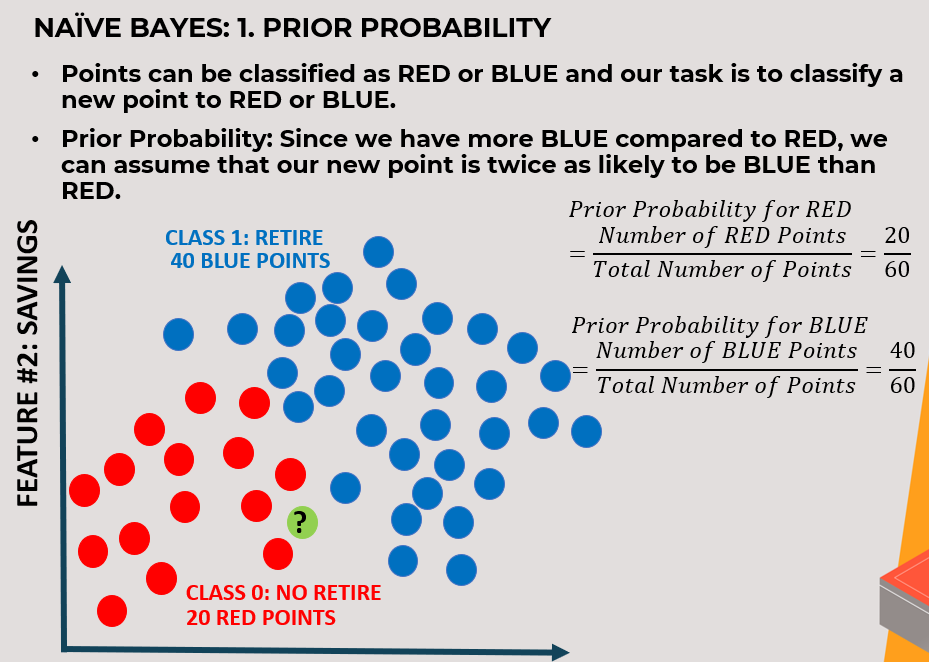

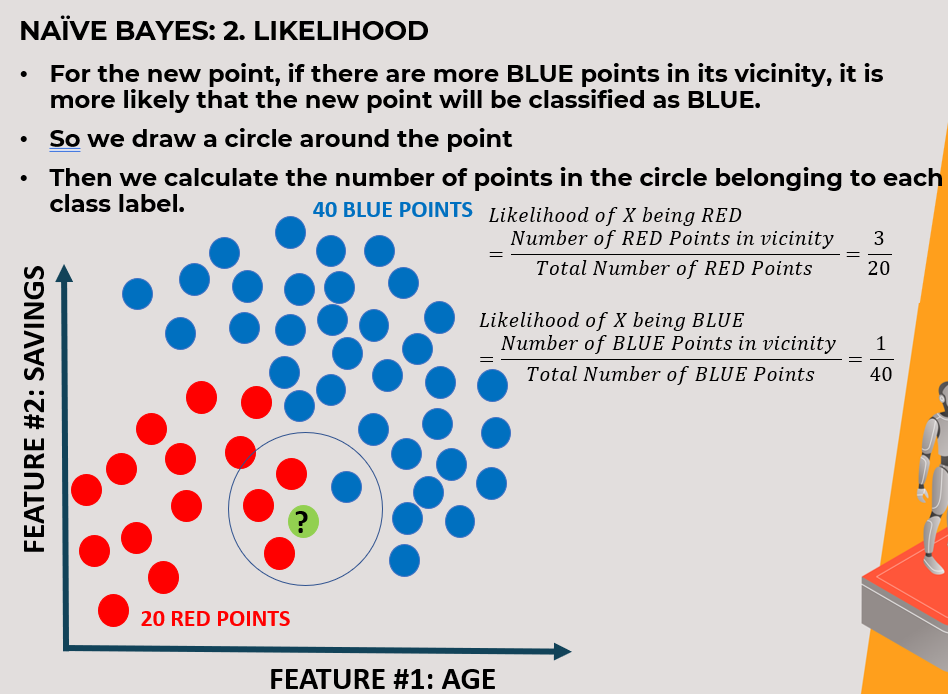

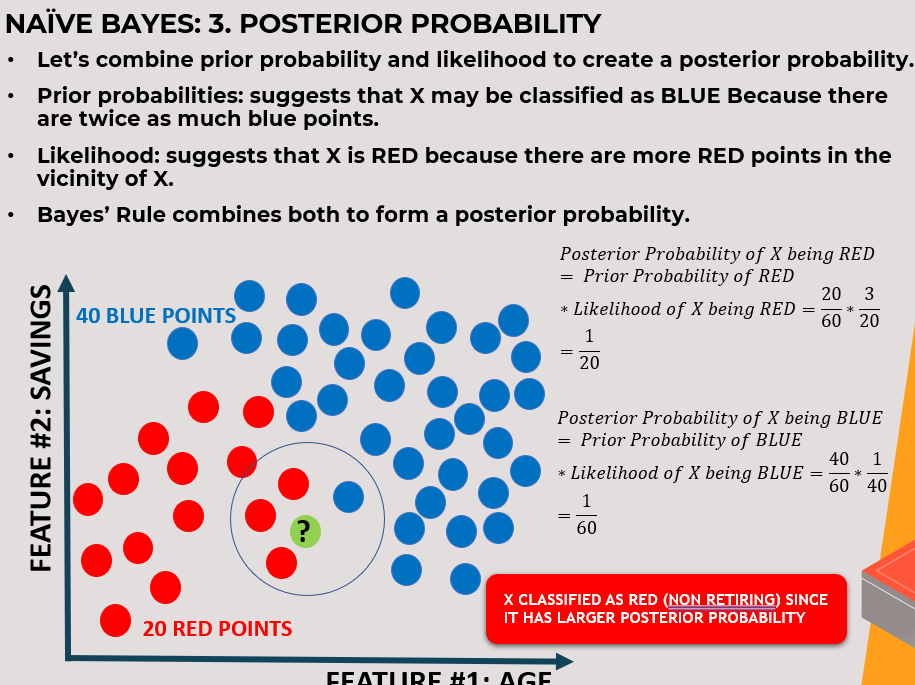

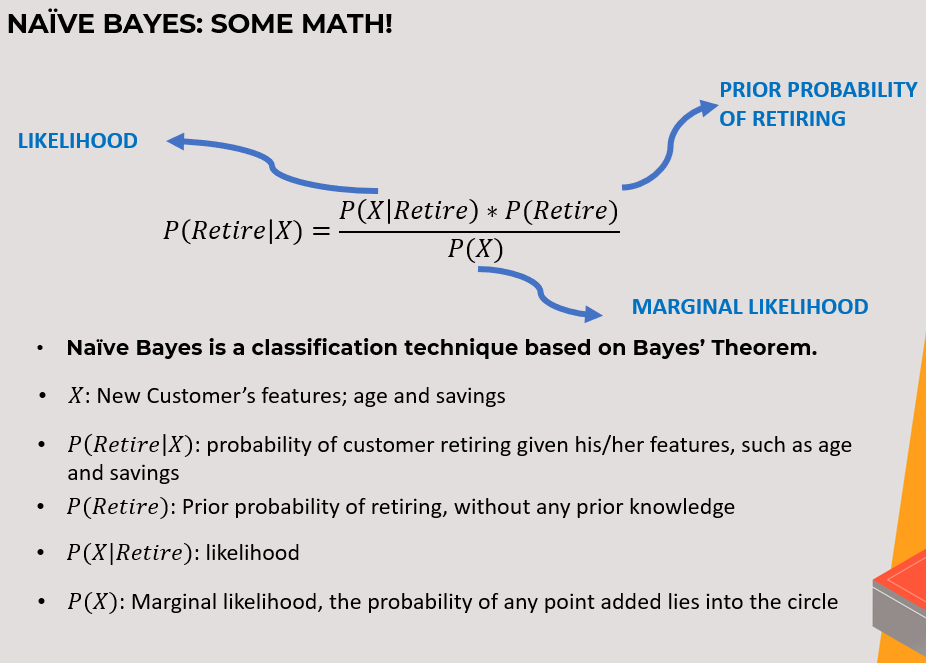

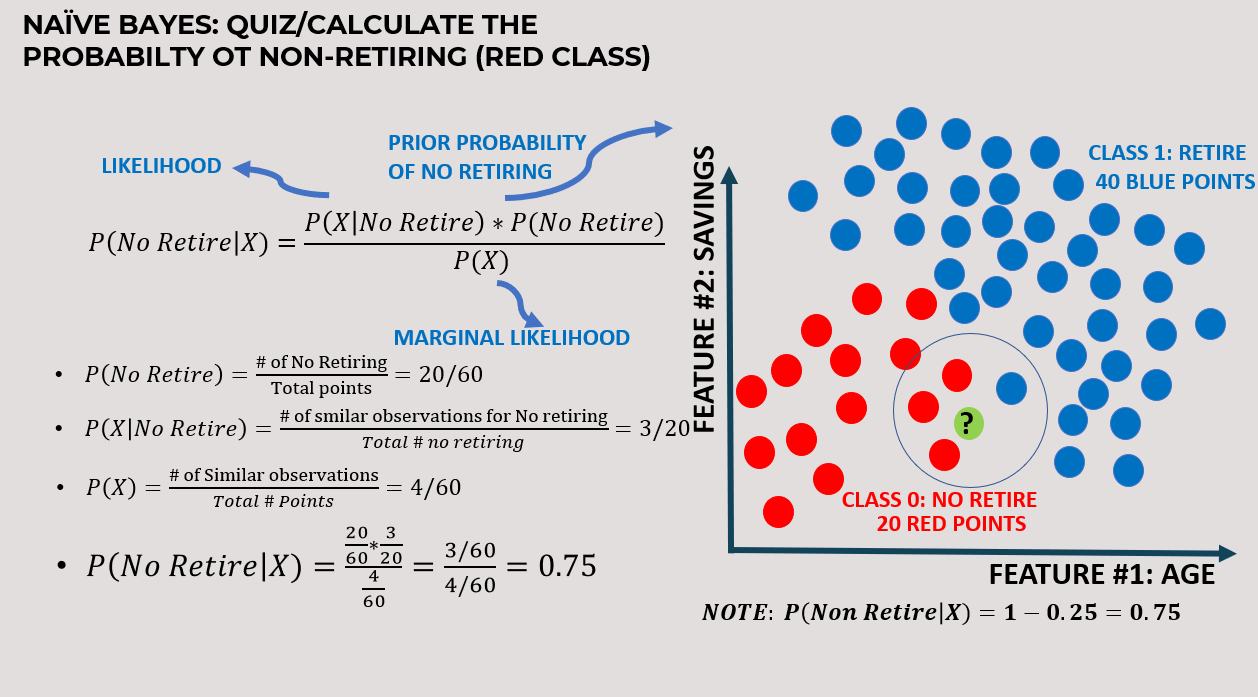

# TASK 9: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [63]:
print(reviews_tf)

[[0.20429847 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.51564066 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.54001063 0.         0.         ... 0.         0.         0.        ]
 [0.55898037 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(oversampled_x, oversampled_y,test_size=0.2)

In [78]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
model = nb.fit(x_train,y_train)

# TASK 10: ASSESS TRAINED MODEL PERFORMANCE  

In [79]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [80]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

<Axes: >

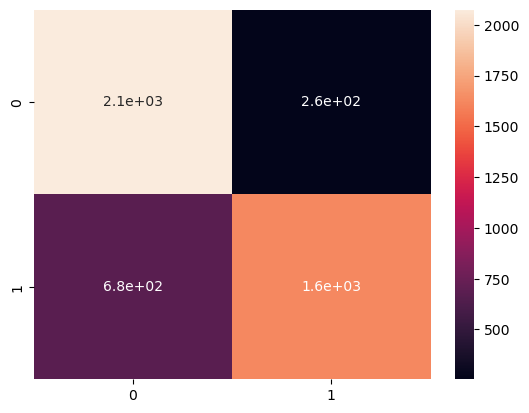

In [81]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True)

In [82]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.91      0.82       564
           1       0.89      0.72      0.80       594

    accuracy                           0.81      1158
   macro avg       0.82      0.81      0.81      1158
weighted avg       0.83      0.81      0.81      1158



# TASK 11: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [83]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [84]:
y_pred = model1.predict(x_test)

In [85]:
print(f'accuracy : {accuracy_score}')

accuracy : <function accuracy_score at 0x00000182311D9F80>


In [86]:
print(f'classification_report : {classification_report(y_test,y_pred)}')

classification_report :               precision    recall  f1-score   support

           0       0.82      0.88      0.85       564
           1       0.87      0.81      0.84       594

    accuracy                           0.84      1158
   macro avg       0.85      0.84      0.84      1158
weighted avg       0.85      0.84      0.84      1158

